In [1]:
import sys
import os

import tensorflow as tf
import numpy as np

sys.path.insert(0,  '/home/calle/keras_one_cycle_clr')
import keras_one_cycle_clr as ktools

import training
import projectname_input

In [2]:
config, config_optim = training.parse_config('/home/calle/config.json', '/srv/data/urop/clean_lastfm.db')

strategy = tf.distribute.MirroredStrategy()
model = training.get_compiled_model('log-mel-spectrogram', strategy, config, config_optim)

InvalidArgumentError: device CUDA:0 not supported by XLA service
	while setting up XLA_GPU_JIT device number 0

In [ ]:
train_dataset, valid_dataset = projectname_input.generate_datasets_from_dir('/srv/data/urop/tfrecords-log-mel-spectrogram/', 'log-mel-spectrogram', split=config.split, 
                                                                            which_split=(True, True, ) + (False, ) * (len(config.split)-2),
                                                                            sample_rate=config.sr, batch_size=config.batch,
                                                                            cycle_length=config.cycle_len,
                                                                            shuffle=config.shuffle, buffer_size=config.shuffle_buffer,
                                                                            num_tags=config.tot_tags, window_size=config.window_len, random=config.window_random,
                                                                            with_tags=config.tags, merge_tags=config.tags_to_merge)

In [ ]:
range_test = ktools.LrRangeTest(lr_range=(1e-5, 1e-1), steps=200, batches_per_step=5, wd_list=[])
history = model.fit(train_dataset, epochs=2, callbacks=[range_test])

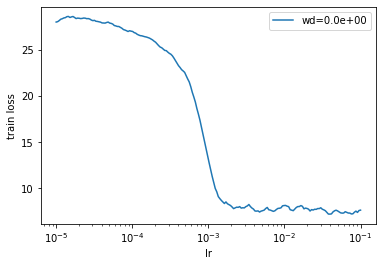

In [60]:
range_test.plot()

In [66]:
wd_test_spectrogram = ktools.LrRangeTest(lr_range=(1e-5, 1e-1), steps=200, batches_per_step=5, wd_list=[0, 1e-4, 1e-2])
history = model.fit(train_dataset, epochs=2, callbacks=[wd_test_spectrogram])

Epoch 1/2
    999/Unknown - 202s 203ms/step - loss: 16.5184 - AUC-ROC: 0.5546 - AUC-PR: 0.0720 202s 203ms/step - loss: 16.5184 - AUC-ROC: 0.5546 - AUC-PR: 0.07

ValueError: You called `set_weights(weights)` on optimizer Adam with a  weight list of length 0, but the optimizer was expecting 117 weights. Provided weights: []...

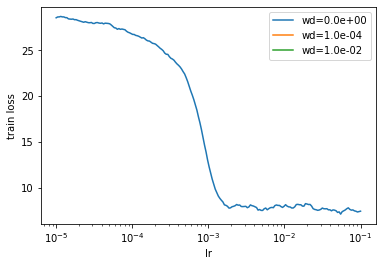

In [67]:
wd_test_spectrogram.plot()

In [50]:
config, config_optim = training.parse_config('/home/calle/config.json', '/srv/data/urop/clean_lastfm.db')

strategy = tf.distribute.MirroredStrategy()
model = training.get_compiled_model('waveform', strategy, config, config_optim)

In [51]:
train_dataset, valid_dataset = projectname_input.generate_datasets_from_dir('/srv/data/urop/tfrecords-waveform/', 'waveform', split=config.split, 
                                                                            which_split=(True, True, ) + (False, ) * (len(config.split)-2),
                                                                            sample_rate=config.sr, batch_size=config.batch,
                                                                            cycle_length=config.cycle_len,
                                                                            shuffle=config.shuffle, buffer_size=config.shuffle_buffer,
                                                                            num_tags=config.tot_tags, window_size=config.window_len, random=config.window_random,
                                                                            with_tags=config.tags, merge_tags=config.tags_to_merge)

In [ ]:
range_test = ktools.LrRangeTest(lr_range=(1e-5, 1), steps=200, batches_per_step=5, wd_list=[])
history = model.fit(train_dataset, epochs=2, callbacks=[range_test])

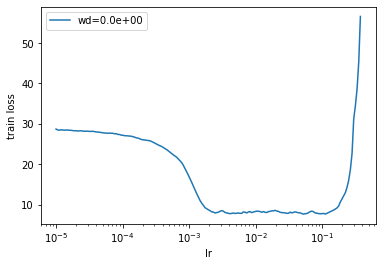

In [53]:
range_test.plot()

In [ ]:
wd_test_wave = ktools.LrRangeTest(lr_range=(1e-5, 1e-1), steps=200, batches_per_step=5, wd_list=[0, 1e-4, 1e-2])
history = model.fit(train_dataset, epochs=2, callbacks=[wd_test_wave])

In [ ]:
wd_test_wave.plot()